<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/diag_bif_angeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Diagrama de bifurcación Angeli

Nombre: Biología de sistemas 

Fecha: 7 de diciembre

Cargar Grind.R

In [29]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
source("Grind.R")

grind.R was sourced


Establecer modelo

In [35]:
model <- function(t, state, parms){
  with(as.list(c(state, parms)),{

    dx <- alpha1*(1-x) - beta1*x*(v*y)^gamma1/(k1+(v*y)^gamma1)
    dy <- alpha2*(1-y) - beta2*y*x^gamma2/(k2+x^gamma2)

    return(list(c(dx, dy)))

  })
}

Declarar el valor de los parámetros que permenacen constantes 

In [32]:
p <- c(alpha1 = 1, alpha2 = 1, beta1 = 200, beta2 = 10, gamma1 = 4, gamma2 = 4, k1 = 30, k2 = 1, v = 1)

Establecer condiciones inciales

In [33]:
s <- c(x = 0, y = 0)

Grafica las ceroclinas para este valor de v

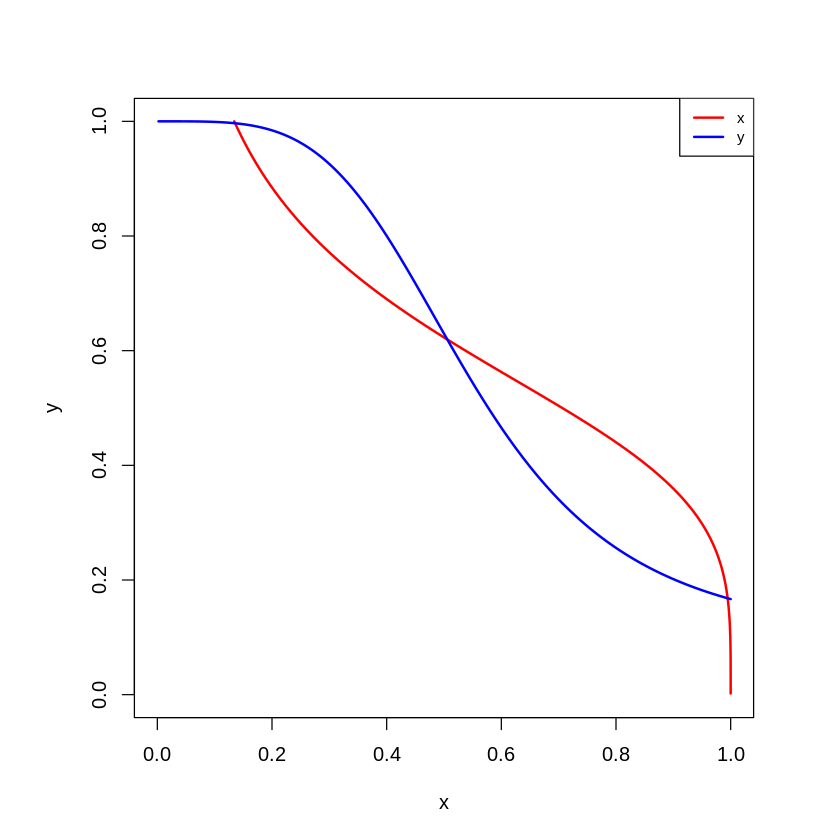

In [36]:
par(pty = "s") # ejes cuadrados
plane(xmin = 0, xmax = 1, ymin = 0, ymax = 1)

Ahora obtengamos estos tres puntos de equilibrio

In [37]:
mid <- newton(s, plot = FALSE)
low <- newton(c(x=1,y=0),plot=FALSE)
hig <- newton(c(x=0,y=1),plot=FALSE)

        x         y 
0.5057743 0.6195077 
Unstable point, eigenvalues:  -4.795959 1.204608 
        x         y 
0.9946980 0.1681565 
Stable point, eigenvalues:  -5.989611 -0.9625594 
        x         y 
0.1357302 0.9966187 
Stable point, eigenvalues:  -7.419698 -0.9512533 


Diagrama de bifurcación


Starting at v = 1 with:
        x         y 
0.1357302 0.9966187 
Starting at v = 1 with:
        x         y 
0.9946980 0.1681565 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Starting at v = 1 with:
        x         y 
0.5057743 0.6195077 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Final point at v = 0.8315781 
If this looks wrong try changing the step size


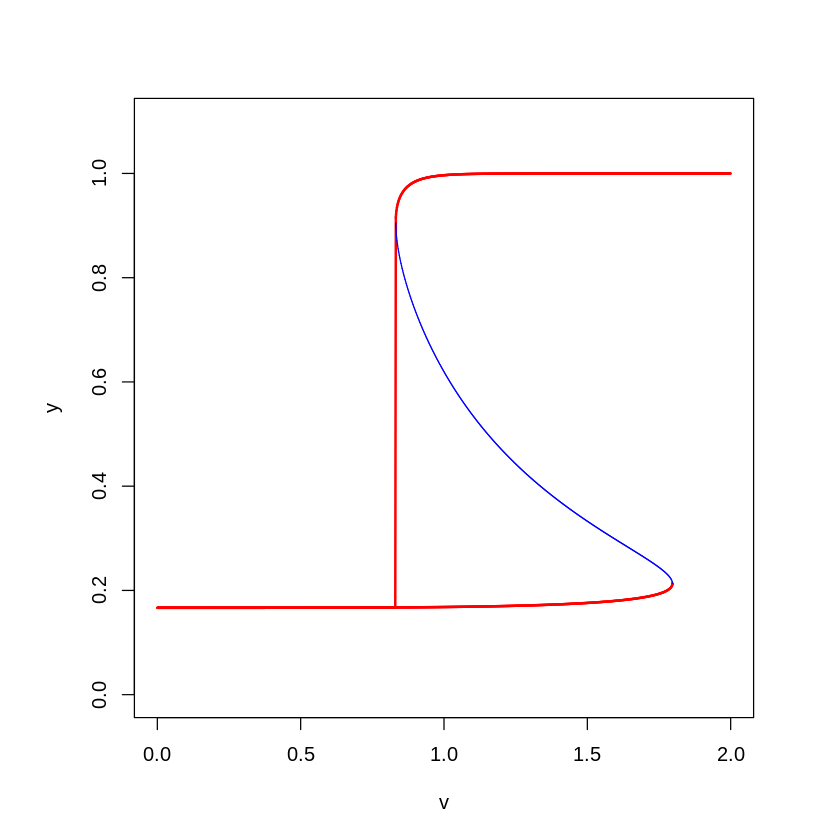

In [39]:
par(pty = "s")
continue(state=hig, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1, add=F) # log="", time=0, positive=TRUE, add=TRUE)
continue(state=low, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)
continue(state=mid, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="y", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)


Starting at v = 1 with:
        x         y 
0.1357302 0.9966187 
Starting at v = 1 with:
        x         y 
0.9946980 0.1681565 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Starting at v = 1 with:
        x         y 
0.5057743 0.6195077 
Final point at v = 1.796859 
If this looks wrong try changing the step size
Final point at v = 0.8315781 
If this looks wrong try changing the step size


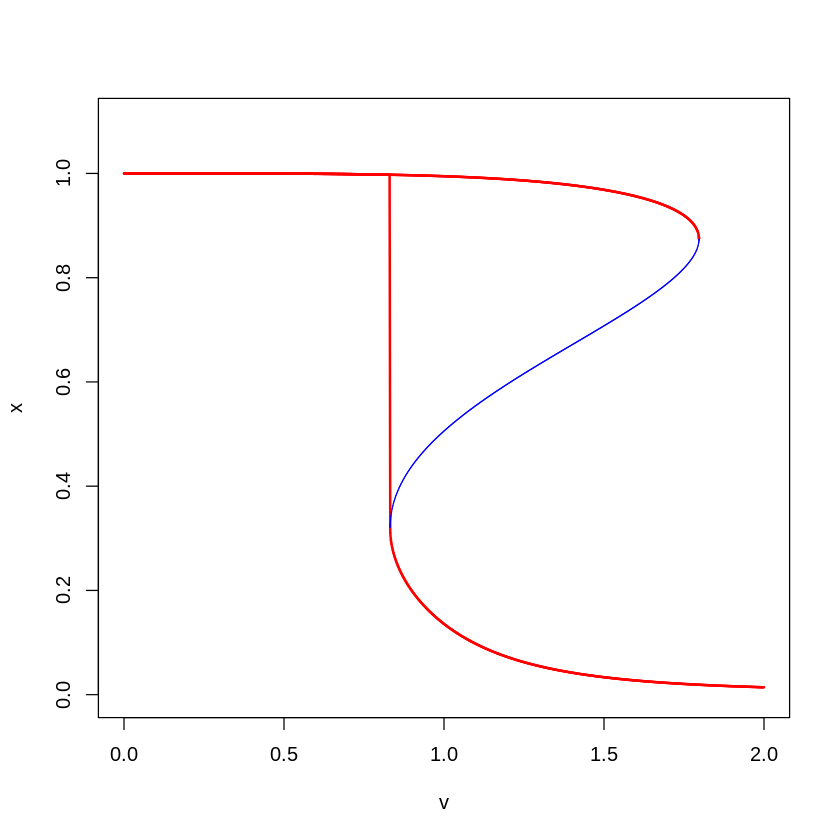

In [40]:
continue(state=hig, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="x", ymin=0, ymax=1.1, add=F) # log="", time=0, positive=TRUE, add=TRUE)
continue(state=low, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="x", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)
continue(state=mid, parms=p, odes=model, x="v", step=0.001, xmin=0, xmax=2,y="x", ymin=0, ymax=1.1, log="", time=0, positive=TRUE, add=TRUE)


De los diagramas anteriores se observa que los puntos de bifurcación están en v = 0.831 y v = 1.796

Otra manera de indentificar las bifurcaciones

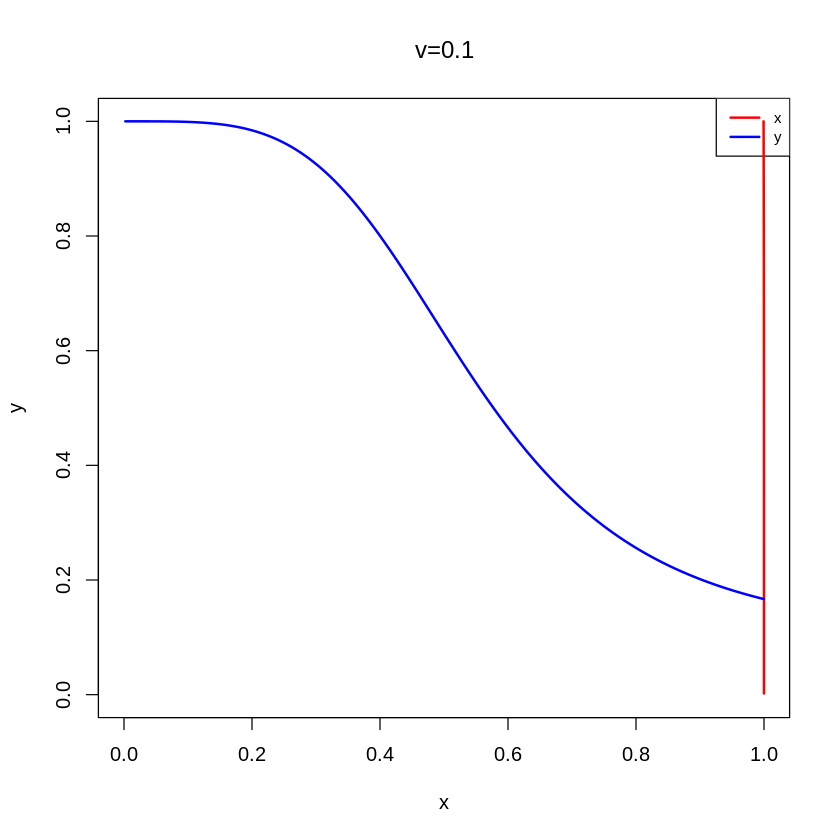

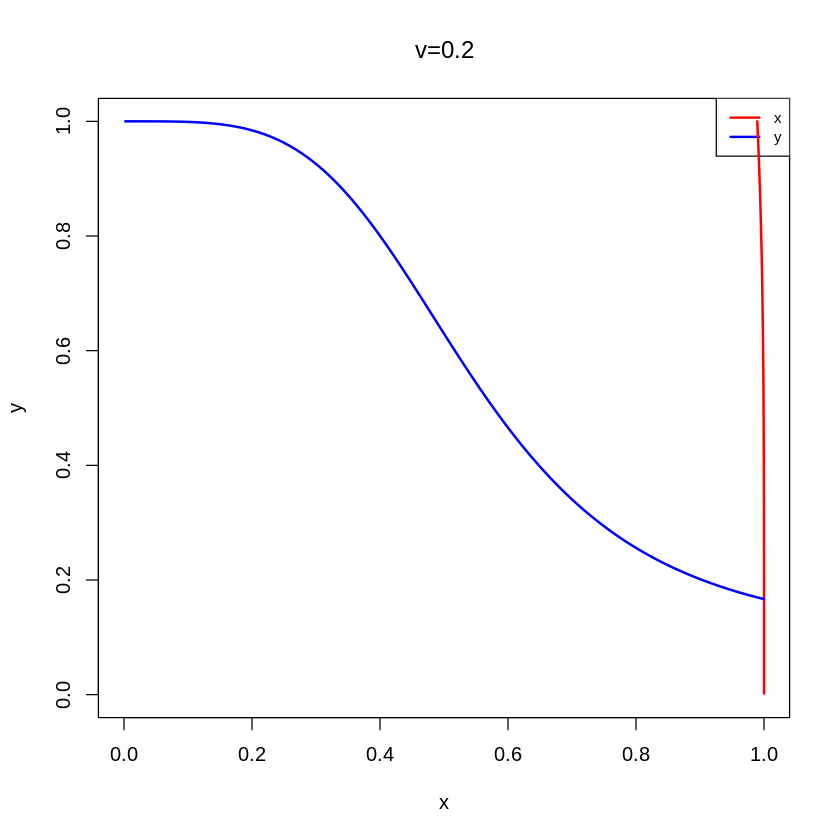

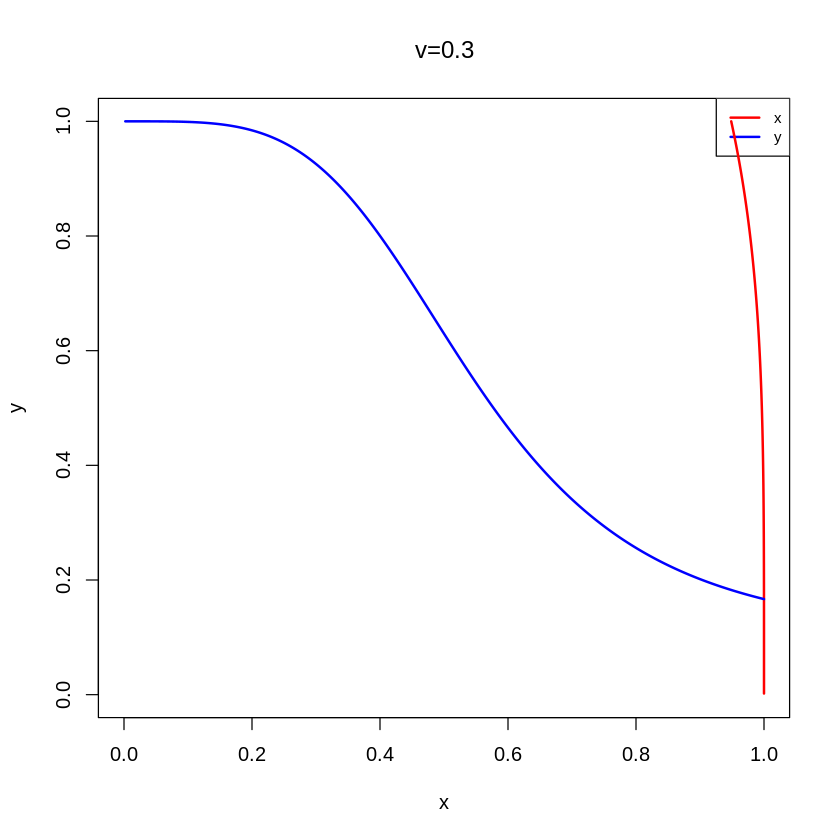

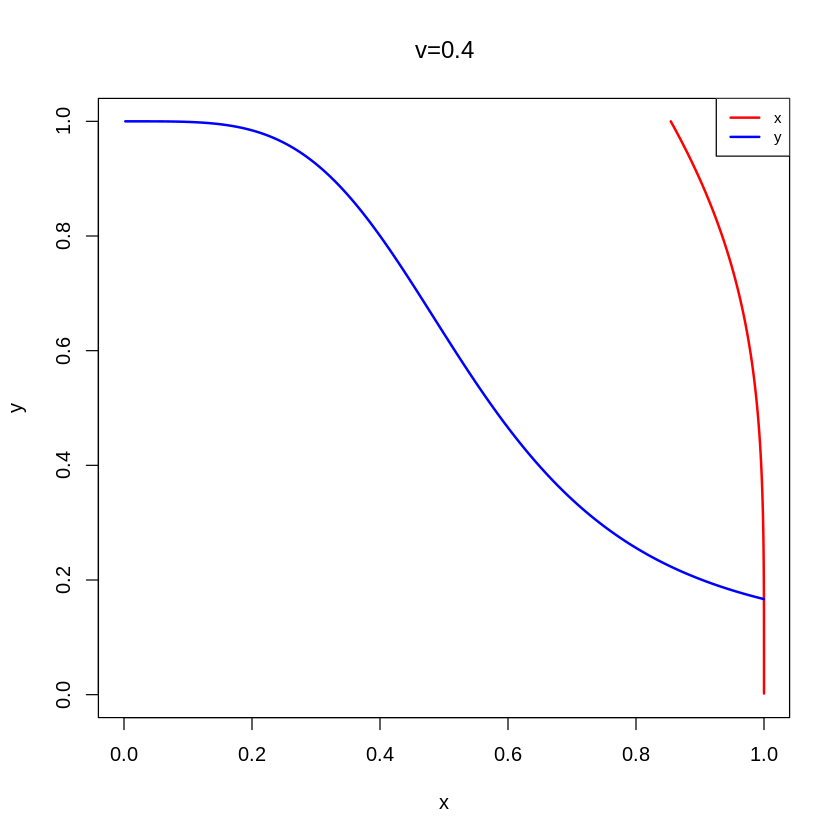

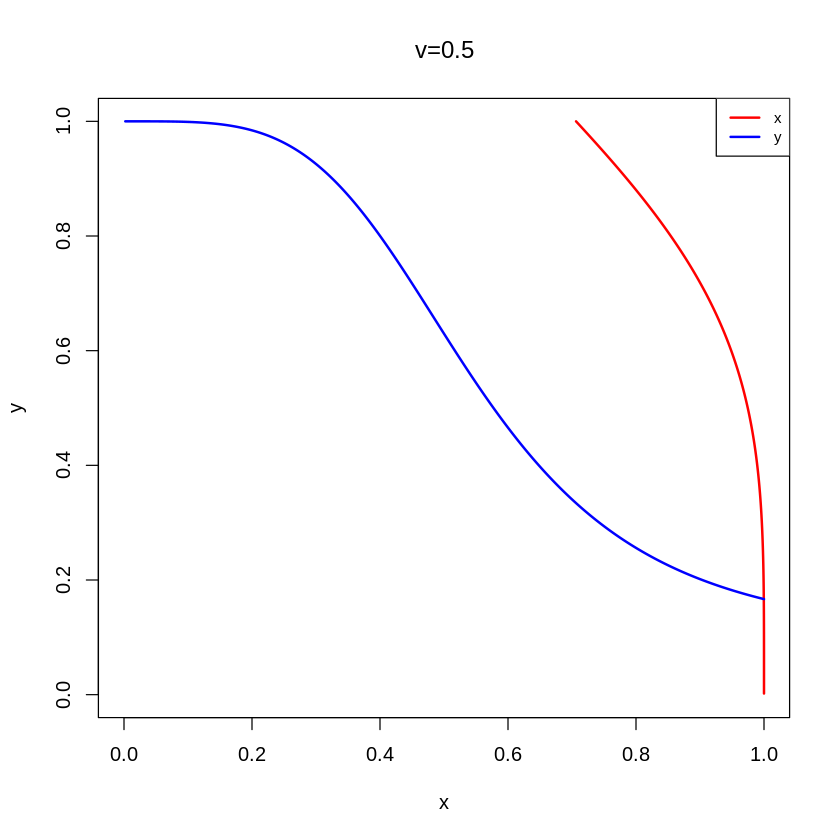

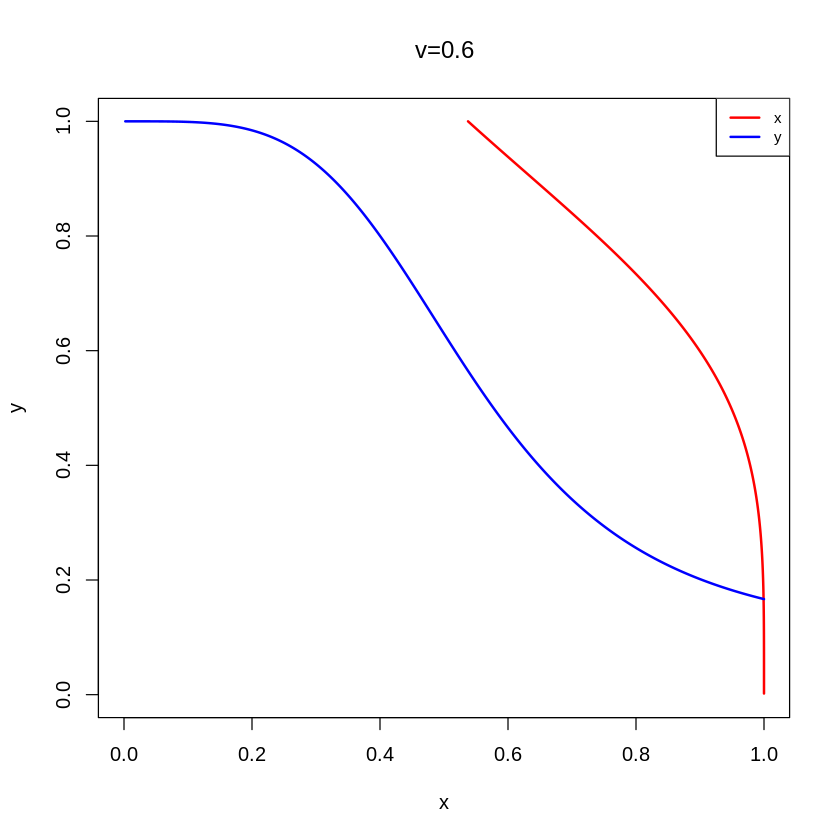

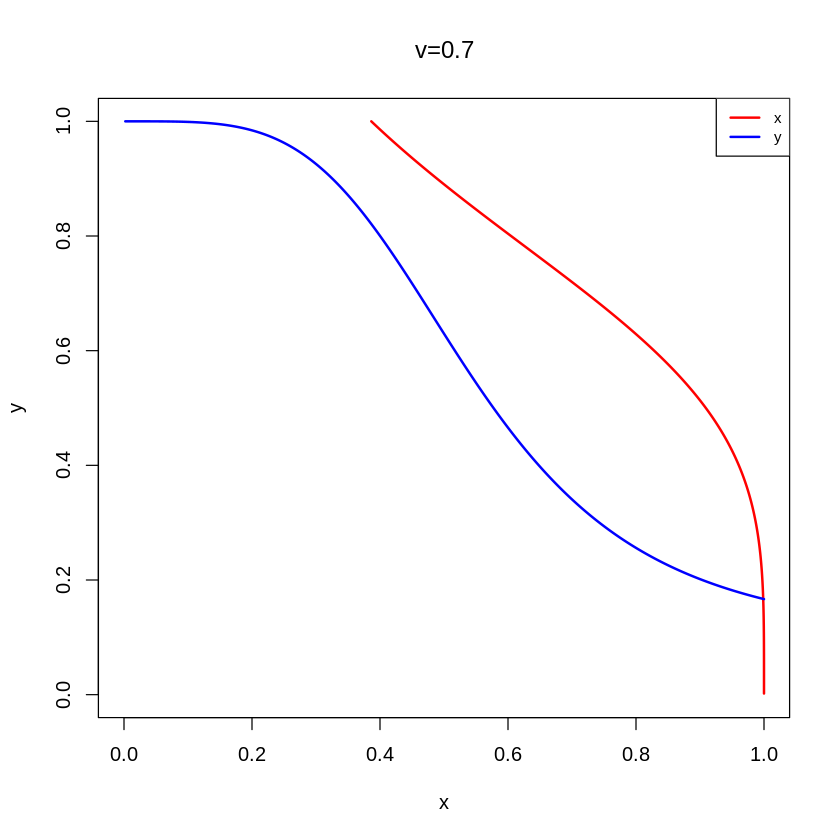

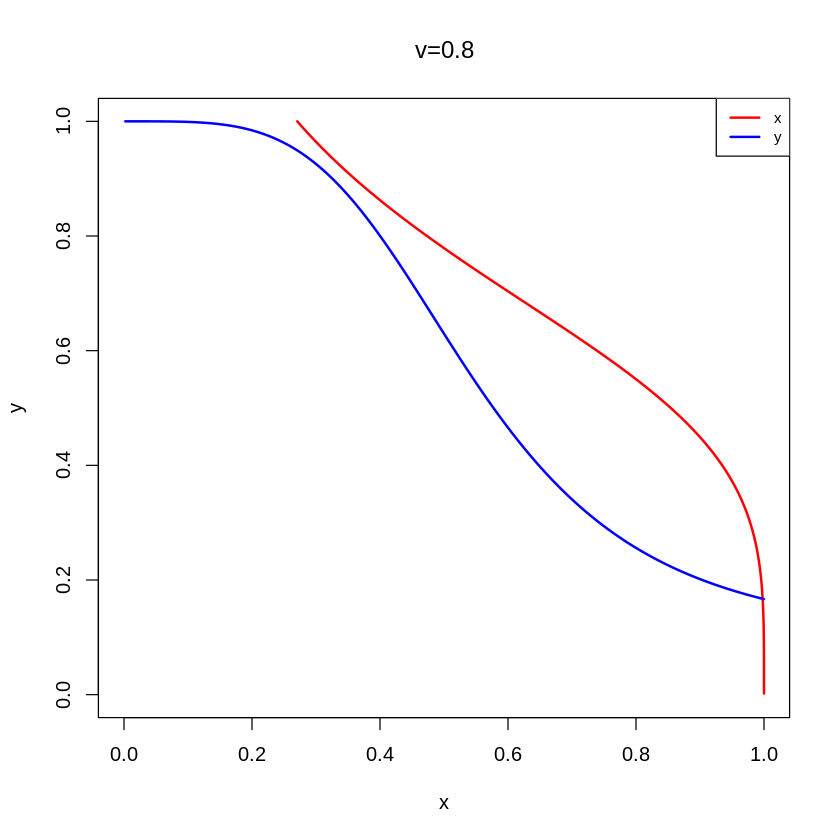

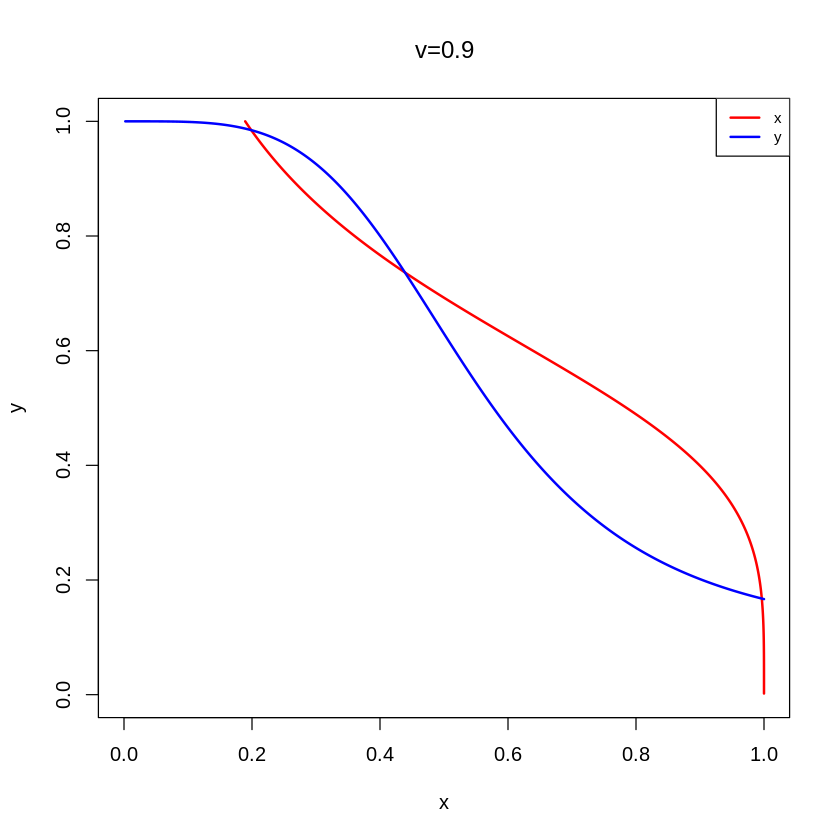

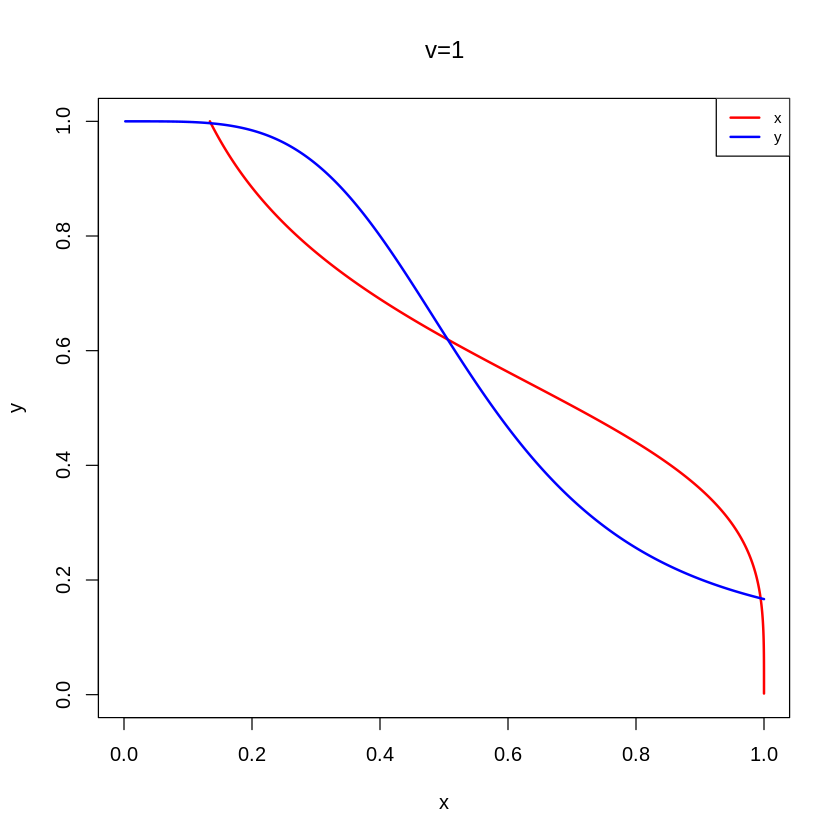

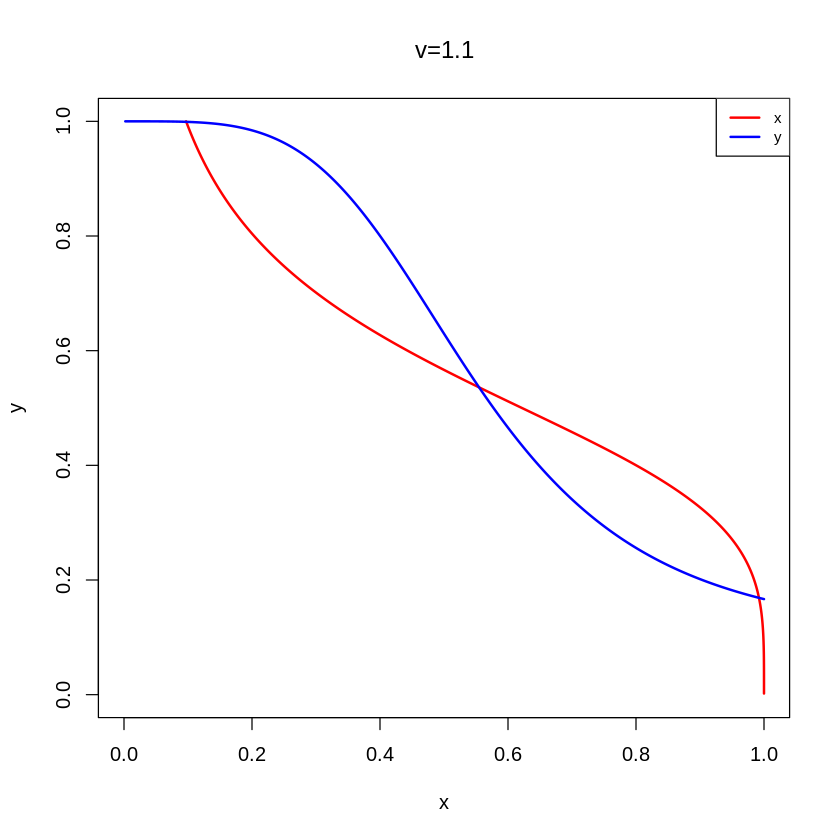

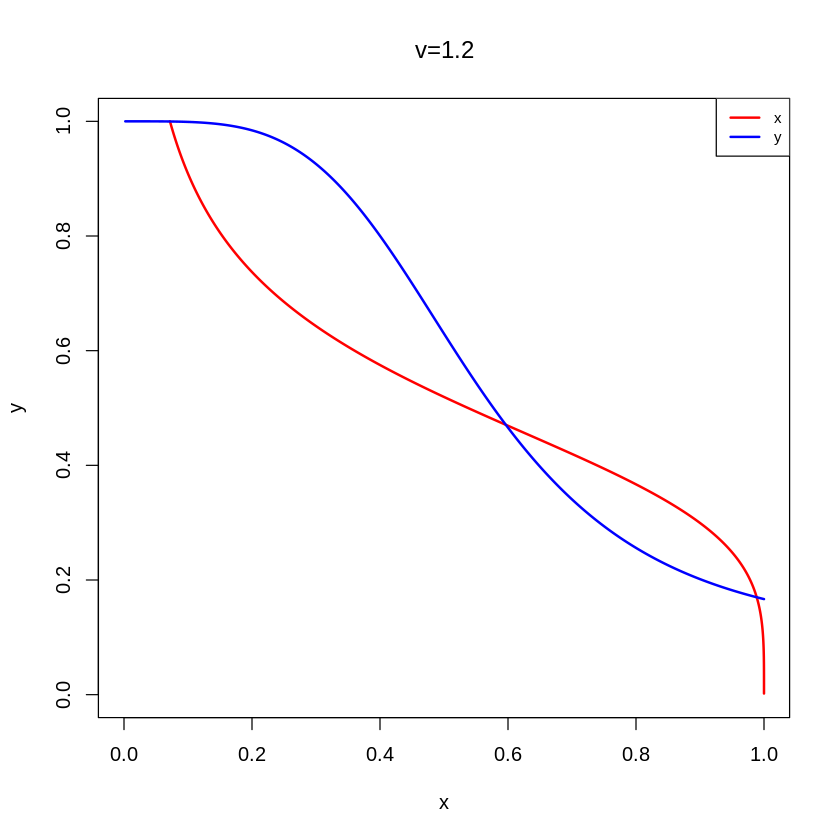

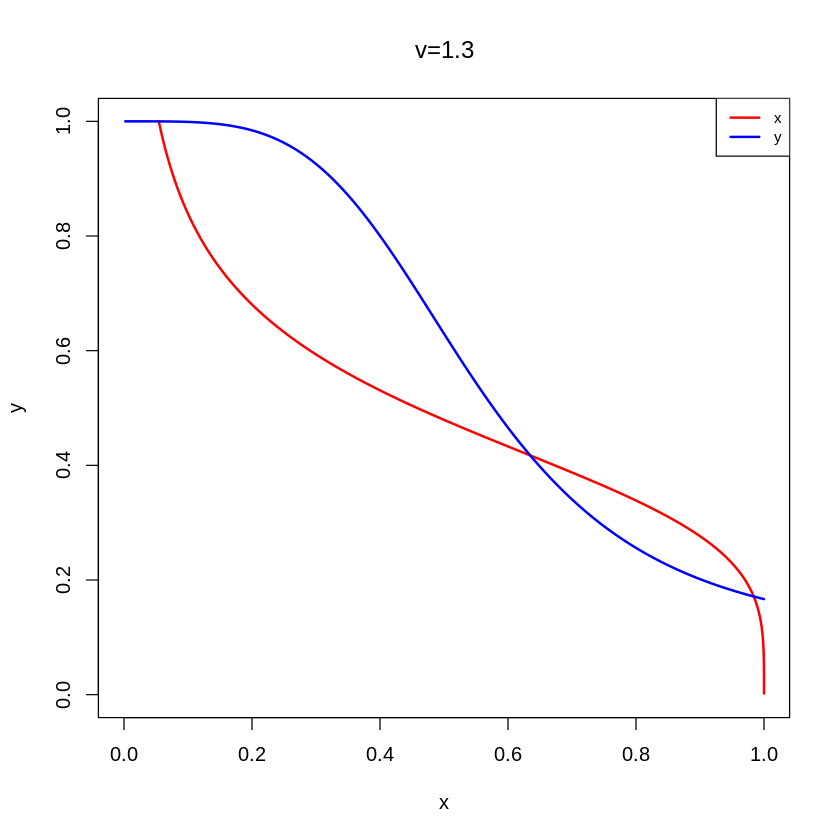

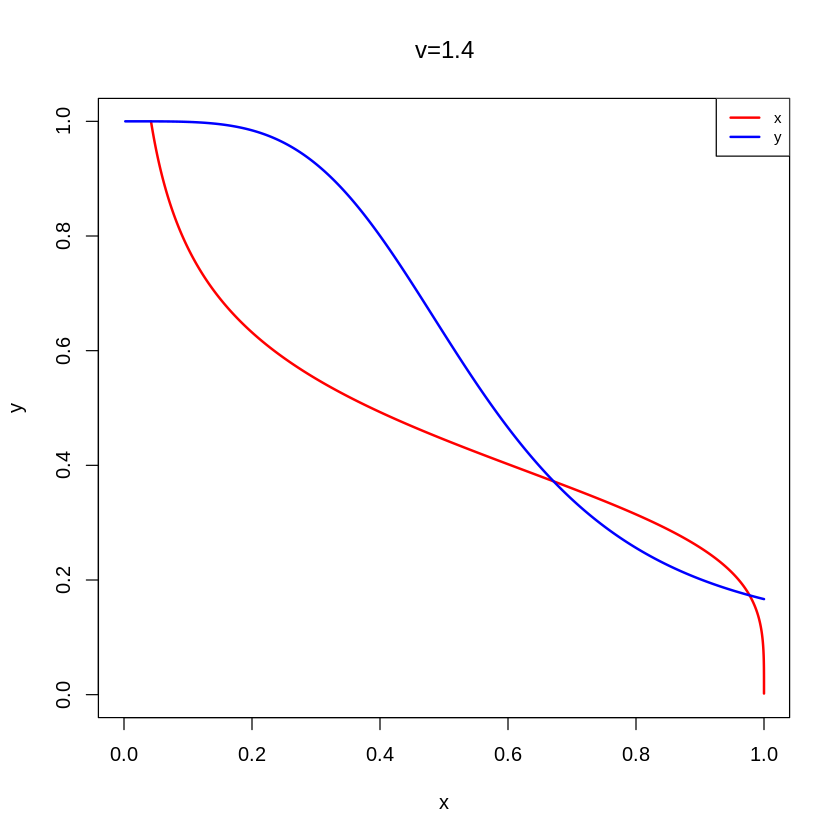

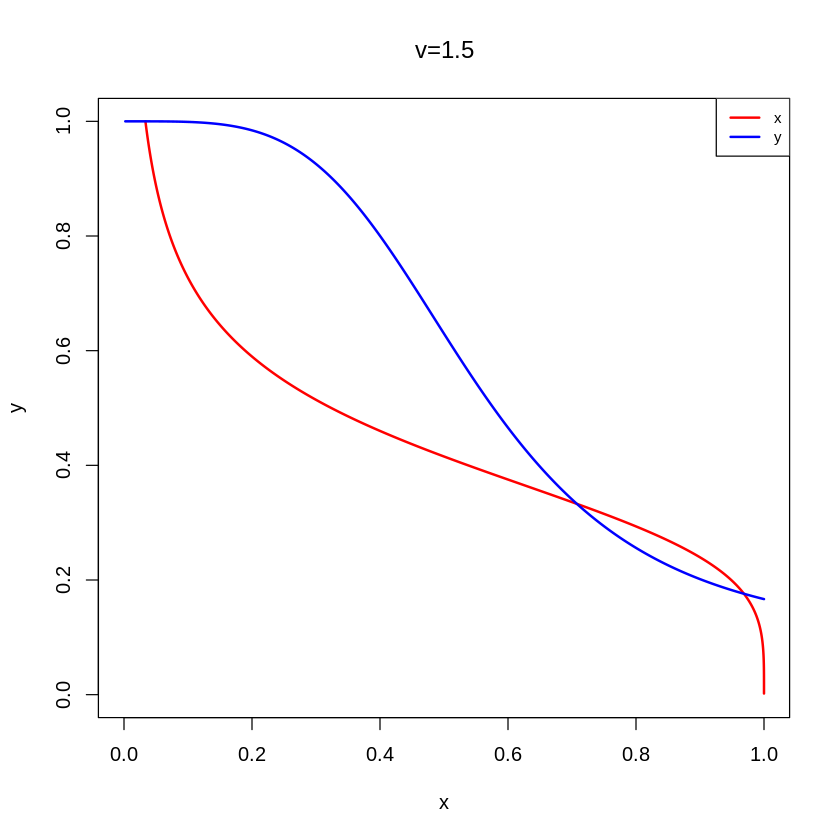

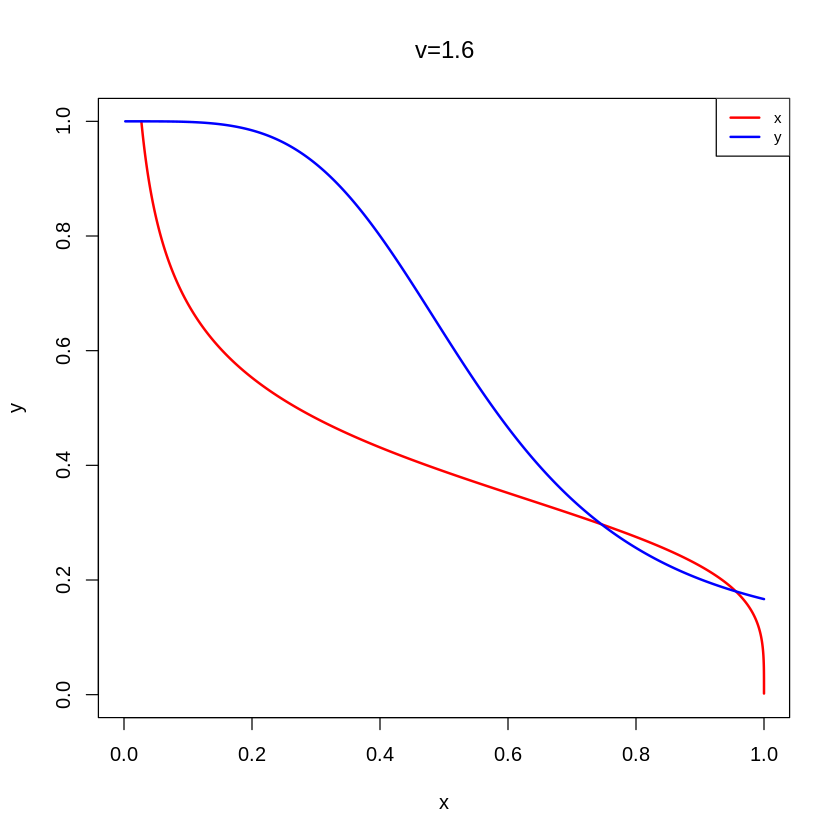

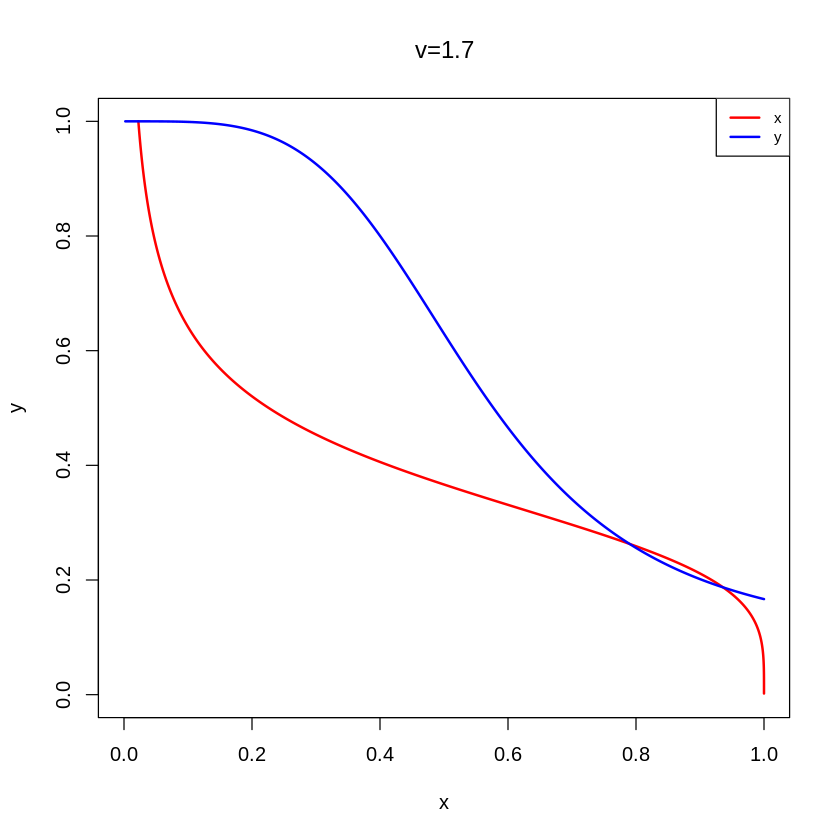

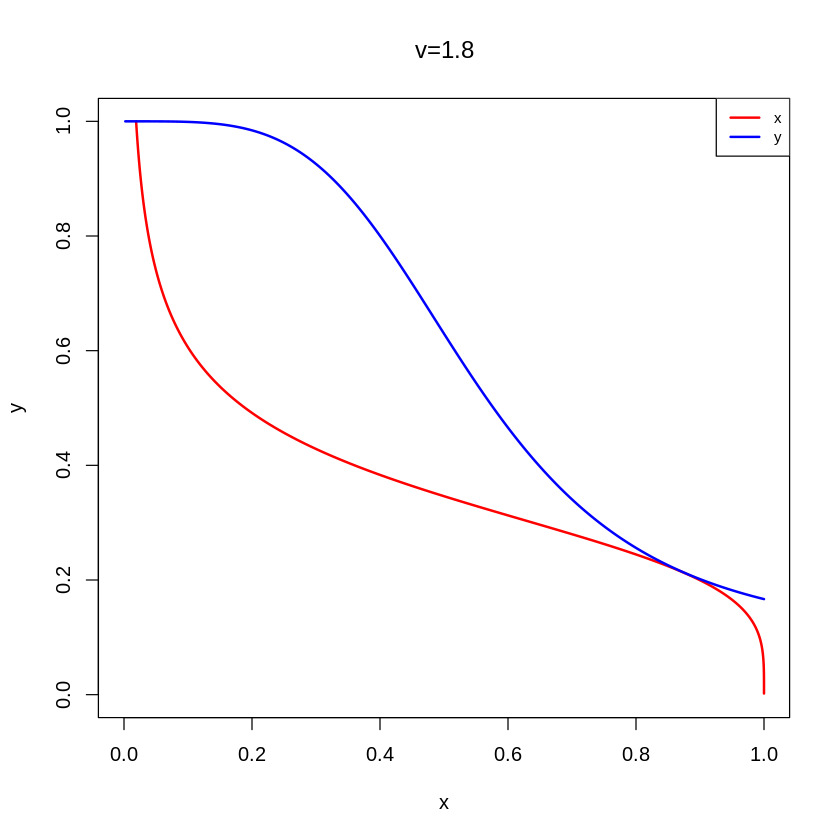

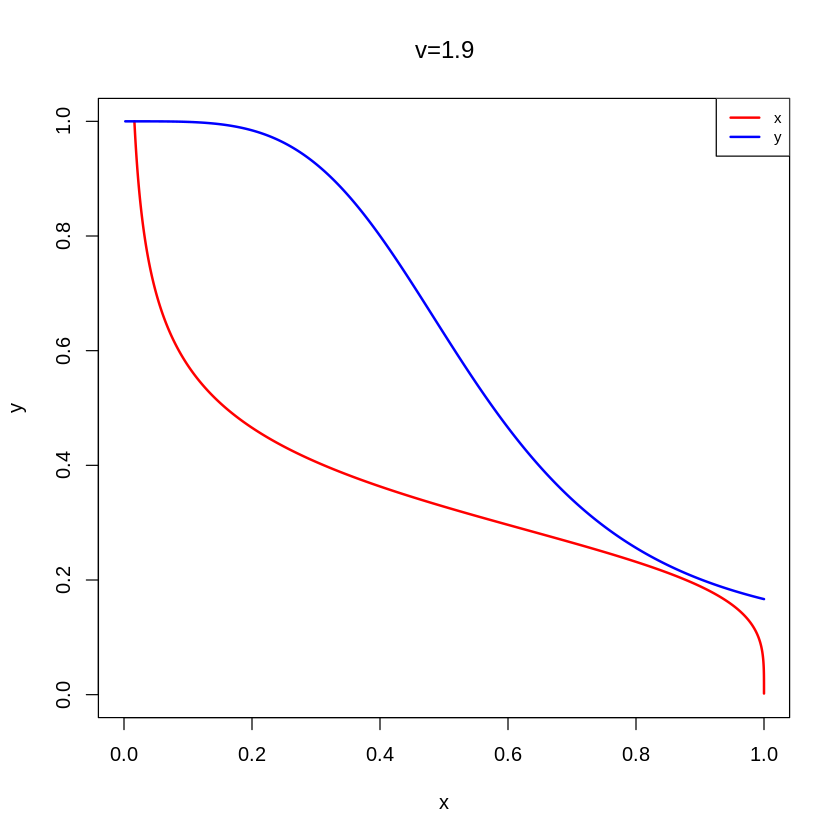

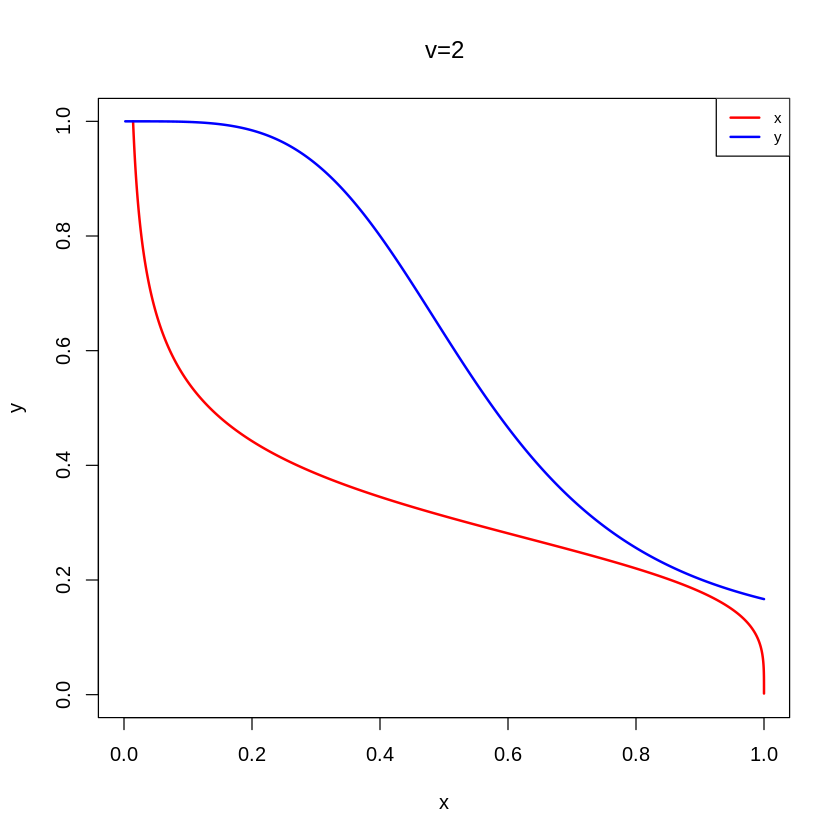

In [45]:
for(v in seq(0.1,2,0.1)) {

  p["v"] <- v
  plane(xmin = 0, xmax = 1, ymin = 0, ymax = 1, main = paste0("v=",v))
}